In [1]:
import pandas as pd 

data = pd.read_csv('happyscore_income.csv')
data.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


In [3]:
#data.sort_values('avg_income',inplace=True)
#richest  = data[data['avg_income']> 15000]

In [4]:
from sklearn.cluster import KMeans 
import numpy as np
import matplotlib.pyplot as plt 



X= data['avg_income']
y= data['happyScore']

income_happy = np.column_stack((X,y))
Km_res = KMeans(n_clusters=5).fit(income_happy)
clus_centers= Km_res.cluster_centers_
clus_centers



/home/ml/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[4.11581752e+03, 5.46229630e+00],
       [1.75374387e+04, 6.96750000e+00],
       [1.44518229e+03, 4.42011364e+00],
       [8.26221350e+03, 5.96055000e+00],
       [2.36467562e+04, 7.29350000e+00]])

Text(0.5, 0, 'avg_income')

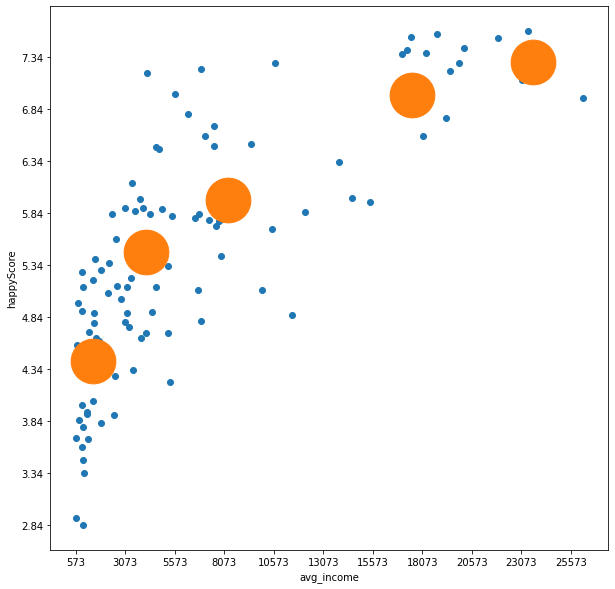

In [5]:

y_np = np.array(y)
x_np = np.array(X)

plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.scatter(clus_centers[:,0],clus_centers[:,1],s=2000)

plt.yticks(np.arange(y_np.min(), y_np.max(), step=0.5))
plt.xticks(np.arange(x_np.min(),x_np.max(),step=2500))
#for a, row in df.iterrows():
    #plt.text(row['avg_income'],row['happyScore'],s=row['country'])
plt.ylabel('happyScore')
plt.xlabel('avg_income')


Text(0.5, 0, 'inequality')

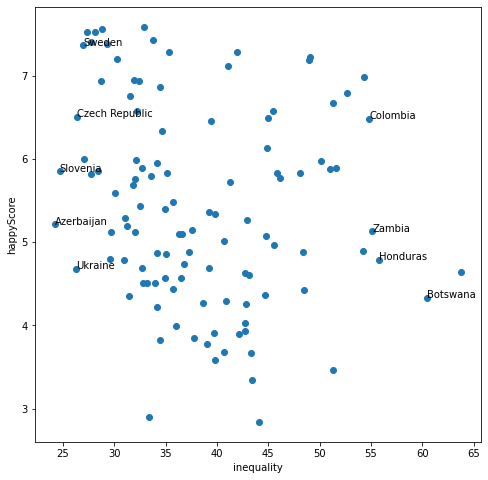

In [6]:
data.sort_values('income_inequality',inplace=True)
X = data['income_inequality']
y = data['happyScore']
z = data['country']

plt.figure(figsize=(8,8))
plt.scatter(X,y)
for i in range(110):
    if i < 5 or i >105:
        plt.text(X.iloc[i] ,y.iloc[i] ,s=z.iloc[i])
plt.ylabel('happyScore')
plt.xlabel('inequality')

# inequality_happy = np.column_stack((X,y))
# Km_res = KMeans(n_clusters=5).fit(inequality_happy)
# clus_centers= Km_res.cluster_centers_

# plt.scatter(clus_centers[:,0],clus_centers[:,1],s=2000)
# for a, row in data.iterrows():
# #     if a < 2 or a > 105: 
#     plt.text(row['avg_income'],row['happyScore'],s=row['country'])

In [7]:
y = data['happyScore'].values

X = data.drop(['happyScore', 'country', 'region', 'country.1'] ,axis =1)



In [8]:
X.shape, y.shape

((111, 7), (111,))

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

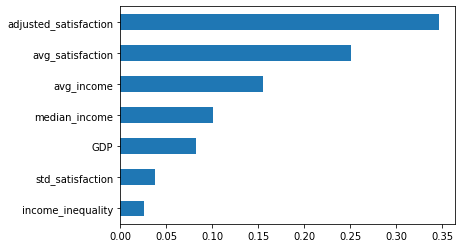

In [10]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
figure = feat_importance.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [11]:
matrix_corr = data.corr()
matrix_corr.happyScore.sort_values()

/tmp/ipykernel_8645/3403097865.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = data.corr()


std_satisfaction        -0.457896
income_inequality       -0.187222
median_income            0.760328
avg_income               0.782122
GDP                      0.790061
avg_satisfaction         0.885988
adjusted_satisfaction    0.901213
happyScore               1.000000
Name: happyScore, dtype: float64

In [12]:
#X = data[['adjusted_satisfaction', 'avg_satisfaction', 'GDP', 'avg_income']]

In [13]:
from sklearn.preprocessing import PolynomialFeatures , StandardScaler


poly_features = PolynomialFeatures(degree=5, include_bias=False)

X_poly = poly_features.fit_transform(X)

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)
#y_scaler = scaler.fit_transform(y)


In [49]:


from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
 

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=11, test_size=0.20)
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
lin_predictions = linear_model.predict(X_test)

elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)


ElasticNet()

In [50]:
linear_model.score(X_test, y_test), elastic_model.score(X_test, y_test)

(0.808422328684183, 0.8218920541976693)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(y_test, lin_predictions), mean_absolute_error(y_test, lin_predictions)

(0.24047650950859417, 0.37016888332239894)

Text(0.5, 0, 'Predictions')

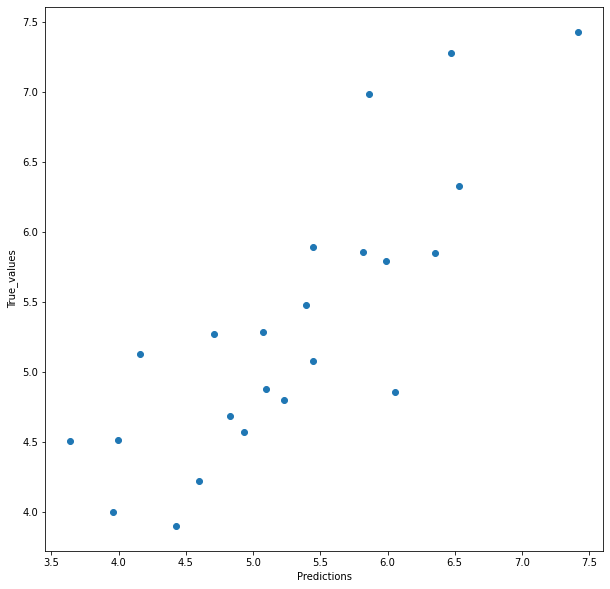

In [17]:
plt.figure(figsize=(10,10))
# plt.scatter(X,y)
plt.scatter(lin_predictions, y_test)
# plt.scatter(clus_centers[:,0],clus_centers[:,1],s=2000)


# plt.yticks(np.arange(y_np.min(), y_np.max(), step=0.5))
# plt.xticks(np.arange(x_np.min(),x_np.max(),step=2500))

plt.ylabel('True_values')
plt.xlabel('Predictions')



In [18]:
from sklearn.svm import SVR

#, 'avg_satisfaction', 'GDP', 'avg_income'

X = data[['adjusted_satisfaction']]

poly_features = PolynomialFeatures(degree=3, include_bias=True)

X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10, test_size=0.20)



In [19]:
svm_model = SVR(kernel='linear')

svm_model.fit(X_train,y_train)

SVR(kernel='linear')

In [20]:
svm_model.score(X_test, y_test)

0.7242738542362461

In [21]:
data.sort_values('income_inequality',inplace=True)
